## Imports

In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

## Simulate ECG data

In [2]:
ecg100 = nk.ecg_simulate(duration=10, noise=0.1, heart_rate=100)
ecg_df = pd.DataFrame({"ECG_100": ecg100})

In [3]:
train_data, test_data = train_test_split(ecg_df, test_size=0.2, random_state=42)

In [4]:
input_layer = Input(shape=(1,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(1, activation='sigmoid')(encoded)

In [5]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [6]:
autoencoder.fit(train_data["ECG_100"], train_data["ECG_100"], epochs=50, batch_size=32, shuffle=True, validation_data=(test_data["ECG_100"], test_data["ECG_100"]))


Epoch 1/50
250/250 [==============================] - 0s 676us/step - loss: 0.0631 - val_loss: 0.0121
Epoch 2/50
250/250 [==============================] - 0s 415us/step - loss: 0.0107 - val_loss: 0.0095
Epoch 3/50
250/250 [==============================] - 0s 413us/step - loss: 0.0096 - val_loss: 0.0088
Epoch 4/50
250/250 [==============================] - 0s 471us/step - loss: 0.0091 - val_loss: 0.0084
Epoch 5/50
250/250 [==============================] - 0s 454us/step - loss: 0.0087 - val_loss: 0.0081
Epoch 6/50
250/250 [==============================] - 0s 563us/step - loss: 0.0085 - val_loss: 0.0079
Epoch 7/50
250/250 [==============================] - 0s 414us/step - loss: 0.0083 - val_loss: 0.0078
Epoch 8/50
250/250 [==============================] - 0s 459us/step - loss: 0.0082 - val_loss: 0.0077
Epoch 9/50
250/250 [==============================] - 0s 452us/step - loss: 0.0081 - val_loss: 0.0076
Epoch 10/50
250/250 [==============================] - 0s 427us/step - loss: 0.008

In [7]:
embedding_model = Model(inputs=input_layer, outputs=encoded)

In [8]:
embeddings = embedding_model.predict(test_data["ECG_100"])

63/63 [==============================] - 0s 270us/step


In [9]:
tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = tsne.fit_transform(embeddings)

In [10]:
tempo_do_vetor = list(range(4000))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


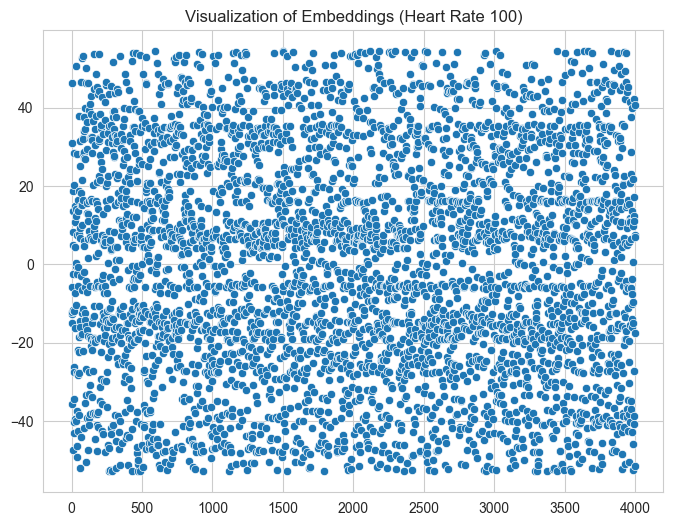

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tempo_do_vetor, y=embedding_tsne.flatten())
plt.title('Visualization of Embeddings (Heart Rate 100)')
plt.show()

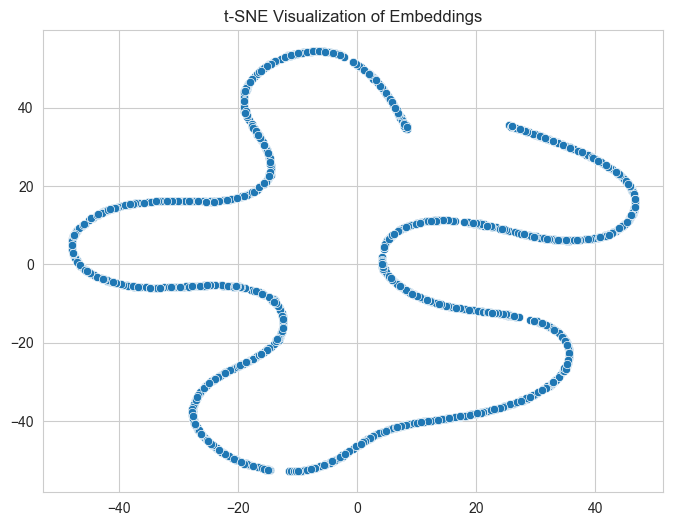

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedding_tsne[:, 0], y=embedding_tsne[:, 1])
plt.title('t-SNE Visualization of Embeddings')
plt.show()

In [14]:
def plot_embeddings_with_noise_variability():
    duration = 10
    noise_levels = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

    fig, axs = plt.subplots(2, 5, figsize=(20, 8))

    for i, noise in enumerate(noise_levels):
        ecg_data = nk.ecg_simulate(duration=duration, noise=noise, heart_rate=100)
        ecg_df = pd.DataFrame({"ECG": ecg_data})

        train_data, test_data = train_test_split(ecg_df, test_size=0.2, random_state=42)

        input_layer = Input(shape=(1,))
        encoded = Dense(128, activation='relu')(input_layer)
        decoded = Dense(1, activation='sigmoid')(encoded)
        autoencoder = Model(input_layer, decoded)
        autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
        autoencoder.fit(train_data["ECG"], train_data["ECG"], epochs=50, batch_size=32, shuffle=True,
                        validation_data=(test_data["ECG"], test_data["ECG"]))

        embedding_model = Model(inputs=input_layer, outputs=encoded)
        embeddings = embedding_model.predict(test_data["ECG"])

        tsne = TSNE(n_components=2, random_state=42)
        embedding_tsne = tsne.fit_transform(embeddings)

        axs[i // 5, i % 5].scatter(embedding_tsne[:, 0], embedding_tsne[:, 1])
        axs[i // 5, i % 5].set_title(f'Noise: {noise}')

    plt.tight_layout()
    plt.show()

Epoch 1/50
250/250 [==============================] - 0s 572us/step - loss: 0.0593 - val_loss: 0.0106
Epoch 2/50
250/250 [==============================] - 0s 425us/step - loss: 0.0085 - val_loss: 0.0081
Epoch 3/50
250/250 [==============================] - 0s 418us/step - loss: 0.0075 - val_loss: 0.0076
Epoch 4/50
250/250 [==============================] - 0s 428us/step - loss: 0.0071 - val_loss: 0.0072
Epoch 5/50
250/250 [==============================] - 0s 411us/step - loss: 0.0067 - val_loss: 0.0069
Epoch 6/50
250/250 [==============================] - 0s 408us/step - loss: 0.0065 - val_loss: 0.0067
Epoch 7/50
250/250 [==============================] - 0s 416us/step - loss: 0.0063 - val_loss: 0.0065
Epoch 8/50
250/250 [==============================] - 0s 409us/step - loss: 0.0062 - val_loss: 0.0064
Epoch 9/50
250/250 [==============================] - 0s 407us/step - loss: 0.0061 - val_loss: 0.0063
Epoch 10/50
250/250 [==============================] - 0s 404us/step - loss: 0.006

Epoch 1/50
250/250 [==============================] - 0s 564us/step - loss: 0.0610 - val_loss: 0.0108
Epoch 2/50
250/250 [==============================] - 0s 434us/step - loss: 0.0084 - val_loss: 0.0079
Epoch 3/50
250/250 [==============================] - 0s 420us/step - loss: 0.0071 - val_loss: 0.0072
Epoch 4/50
250/250 [==============================] - 0s 404us/step - loss: 0.0066 - val_loss: 0.0069
Epoch 5/50
250/250 [==============================] - 0s 409us/step - loss: 0.0064 - val_loss: 0.0067
Epoch 6/50
250/250 [==============================] - 0s 412us/step - loss: 0.0062 - val_loss: 0.0065
Epoch 7/50
250/250 [==============================] - 0s 415us/step - loss: 0.0061 - val_loss: 0.0063
Epoch 8/50
250/250 [==============================] - 0s 410us/step - loss: 0.0059 - val_loss: 0.0062
Epoch 9/50
250/250 [==============================] - 0s 406us/step - loss: 0.0058 - val_loss: 0.0061
Epoch 10/50
250/250 [==============================] - 0s 403us/step - loss: 0.005

Epoch 1/50
250/250 [==============================] - 0s 564us/step - loss: 0.0610 - val_loss: 0.0110
Epoch 2/50
250/250 [==============================] - 0s 409us/step - loss: 0.0094 - val_loss: 0.0084
Epoch 3/50
250/250 [==============================] - 0s 406us/step - loss: 0.0083 - val_loss: 0.0078
Epoch 4/50
250/250 [==============================] - 0s 405us/step - loss: 0.0078 - val_loss: 0.0074
Epoch 5/50
250/250 [==============================] - 0s 407us/step - loss: 0.0074 - val_loss: 0.0071
Epoch 6/50
250/250 [==============================] - 0s 429us/step - loss: 0.0071 - val_loss: 0.0069
Epoch 7/50
250/250 [==============================] - 0s 404us/step - loss: 0.0070 - val_loss: 0.0068
Epoch 8/50
250/250 [==============================] - 0s 403us/step - loss: 0.0069 - val_loss: 0.0067
Epoch 9/50
250/250 [==============================] - 0s 407us/step - loss: 0.0068 - val_loss: 0.0066
Epoch 10/50
250/250 [==============================] - 0s 413us/step - loss: 0.006

Epoch 1/50
250/250 [==============================] - 0s 566us/step - loss: 0.0574 - val_loss: 0.0105
Epoch 2/50
250/250 [==============================] - 0s 411us/step - loss: 0.0087 - val_loss: 0.0082
Epoch 3/50
250/250 [==============================] - 0s 406us/step - loss: 0.0077 - val_loss: 0.0076
Epoch 4/50
250/250 [==============================] - 0s 409us/step - loss: 0.0072 - val_loss: 0.0072
Epoch 5/50
250/250 [==============================] - 0s 404us/step - loss: 0.0069 - val_loss: 0.0070
Epoch 6/50
250/250 [==============================] - 0s 404us/step - loss: 0.0067 - val_loss: 0.0068
Epoch 7/50
250/250 [==============================] - 0s 599us/step - loss: 0.0065 - val_loss: 0.0067
Epoch 8/50
250/250 [==============================] - 0s 411us/step - loss: 0.0064 - val_loss: 0.0066
Epoch 9/50
250/250 [==============================] - 0s 404us/step - loss: 0.0064 - val_loss: 0.0065
Epoch 10/50
250/250 [==============================] - 0s 403us/step - loss: 0.006

Epoch 1/50
250/250 [==============================] - 0s 579us/step - loss: 0.0603 - val_loss: 0.0113
Epoch 2/50
250/250 [==============================] - 0s 421us/step - loss: 0.0084 - val_loss: 0.0087
Epoch 3/50
250/250 [==============================] - 0s 422us/step - loss: 0.0073 - val_loss: 0.0080
Epoch 4/50
250/250 [==============================] - 0s 428us/step - loss: 0.0068 - val_loss: 0.0076
Epoch 5/50
250/250 [==============================] - 0s 422us/step - loss: 0.0065 - val_loss: 0.0074
Epoch 6/50
250/250 [==============================] - 0s 424us/step - loss: 0.0063 - val_loss: 0.0072
Epoch 7/50
250/250 [==============================] - 0s 418us/step - loss: 0.0061 - val_loss: 0.0070
Epoch 8/50
250/250 [==============================] - 0s 418us/step - loss: 0.0060 - val_loss: 0.0069
Epoch 9/50
250/250 [==============================] - 0s 422us/step - loss: 0.0059 - val_loss: 0.0068
Epoch 10/50
250/250 [==============================] - 0s 415us/step - loss: 0.005

Epoch 1/50
250/250 [==============================] - 0s 577us/step - loss: 0.0576 - val_loss: 0.0106
Epoch 2/50
250/250 [==============================] - 0s 423us/step - loss: 0.0091 - val_loss: 0.0079
Epoch 3/50
250/250 [==============================] - 0s 425us/step - loss: 0.0078 - val_loss: 0.0071
Epoch 4/50
250/250 [==============================] - 0s 418us/step - loss: 0.0073 - val_loss: 0.0068
Epoch 5/50
250/250 [==============================] - 0s 422us/step - loss: 0.0071 - val_loss: 0.0066
Epoch 6/50
250/250 [==============================] - 0s 415us/step - loss: 0.0069 - val_loss: 0.0065
Epoch 7/50
250/250 [==============================] - 0s 410us/step - loss: 0.0068 - val_loss: 0.0064
Epoch 8/50
250/250 [==============================] - 0s 408us/step - loss: 0.0067 - val_loss: 0.0063
Epoch 9/50
250/250 [==============================] - 0s 413us/step - loss: 0.0067 - val_loss: 0.0063
Epoch 10/50
250/250 [==============================] - 0s 407us/step - loss: 0.006

Epoch 1/50
250/250 [==============================] - 0s 566us/step - loss: 0.0584 - val_loss: 0.0106
Epoch 2/50
250/250 [==============================] - 0s 418us/step - loss: 0.0095 - val_loss: 0.0084
Epoch 3/50
250/250 [==============================] - 0s 411us/step - loss: 0.0085 - val_loss: 0.0077
Epoch 4/50
250/250 [==============================] - 0s 404us/step - loss: 0.0079 - val_loss: 0.0073
Epoch 5/50
250/250 [==============================] - 0s 407us/step - loss: 0.0076 - val_loss: 0.0070
Epoch 6/50
250/250 [==============================] - 0s 425us/step - loss: 0.0073 - val_loss: 0.0068
Epoch 7/50
250/250 [==============================] - 0s 426us/step - loss: 0.0072 - val_loss: 0.0067
Epoch 8/50
250/250 [==============================] - 0s 407us/step - loss: 0.0070 - val_loss: 0.0066
Epoch 9/50
250/250 [==============================] - 0s 425us/step - loss: 0.0070 - val_loss: 0.0065
Epoch 10/50
250/250 [==============================] - 0s 404us/step - loss: 0.006

Epoch 1/50
250/250 [==============================] - 0s 574us/step - loss: 0.0549 - val_loss: 0.0106
Epoch 2/50
250/250 [==============================] - 0s 413us/step - loss: 0.0083 - val_loss: 0.0080
Epoch 3/50
250/250 [==============================] - 0s 410us/step - loss: 0.0072 - val_loss: 0.0073
Epoch 4/50
250/250 [==============================] - 0s 410us/step - loss: 0.0066 - val_loss: 0.0069
Epoch 5/50
250/250 [==============================] - 0s 404us/step - loss: 0.0062 - val_loss: 0.0066
Epoch 6/50
250/250 [==============================] - 0s 418us/step - loss: 0.0060 - val_loss: 0.0064
Epoch 7/50
250/250 [==============================] - 0s 416us/step - loss: 0.0059 - val_loss: 0.0063
Epoch 8/50
250/250 [==============================] - 0s 408us/step - loss: 0.0058 - val_loss: 0.0062
Epoch 9/50
250/250 [==============================] - 0s 404us/step - loss: 0.0057 - val_loss: 0.0062
Epoch 10/50
250/250 [==============================] - 0s 403us/step - loss: 0.005

Epoch 1/50
250/250 [==============================] - 0s 569us/step - loss: 0.0614 - val_loss: 0.0123
Epoch 2/50
250/250 [==============================] - 0s 411us/step - loss: 0.0106 - val_loss: 0.0098
Epoch 3/50
250/250 [==============================] - 0s 406us/step - loss: 0.0096 - val_loss: 0.0092
Epoch 4/50
250/250 [==============================] - 0s 405us/step - loss: 0.0091 - val_loss: 0.0088
Epoch 5/50
250/250 [==============================] - 0s 411us/step - loss: 0.0087 - val_loss: 0.0085
Epoch 6/50
250/250 [==============================] - 0s 405us/step - loss: 0.0085 - val_loss: 0.0083
Epoch 7/50
250/250 [==============================] - 0s 406us/step - loss: 0.0083 - val_loss: 0.0081
Epoch 8/50
250/250 [==============================] - 0s 403us/step - loss: 0.0082 - val_loss: 0.0080
Epoch 9/50
250/250 [==============================] - 0s 404us/step - loss: 0.0081 - val_loss: 0.0079
Epoch 10/50
250/250 [==============================] - 0s 438us/step - loss: 0.008

Epoch 1/50
250/250 [==============================] - 0s 569us/step - loss: 0.0601 - val_loss: 0.0122
Epoch 2/50
250/250 [==============================] - 0s 417us/step - loss: 0.0103 - val_loss: 0.0098
Epoch 3/50
250/250 [==============================] - 0s 416us/step - loss: 0.0093 - val_loss: 0.0092
Epoch 4/50
250/250 [==============================] - 0s 404us/step - loss: 0.0088 - val_loss: 0.0088
Epoch 5/50
250/250 [==============================] - 0s 411us/step - loss: 0.0085 - val_loss: 0.0085
Epoch 6/50
250/250 [==============================] - 0s 410us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 7/50
250/250 [==============================] - 0s 404us/step - loss: 0.0081 - val_loss: 0.0082
Epoch 8/50
250/250 [==============================] - 0s 407us/step - loss: 0.0080 - val_loss: 0.0081
Epoch 9/50
250/250 [==============================] - 0s 412us/step - loss: 0.0079 - val_loss: 0.0080
Epoch 10/50
250/250 [==============================] - 0s 407us/step - loss: 0.007

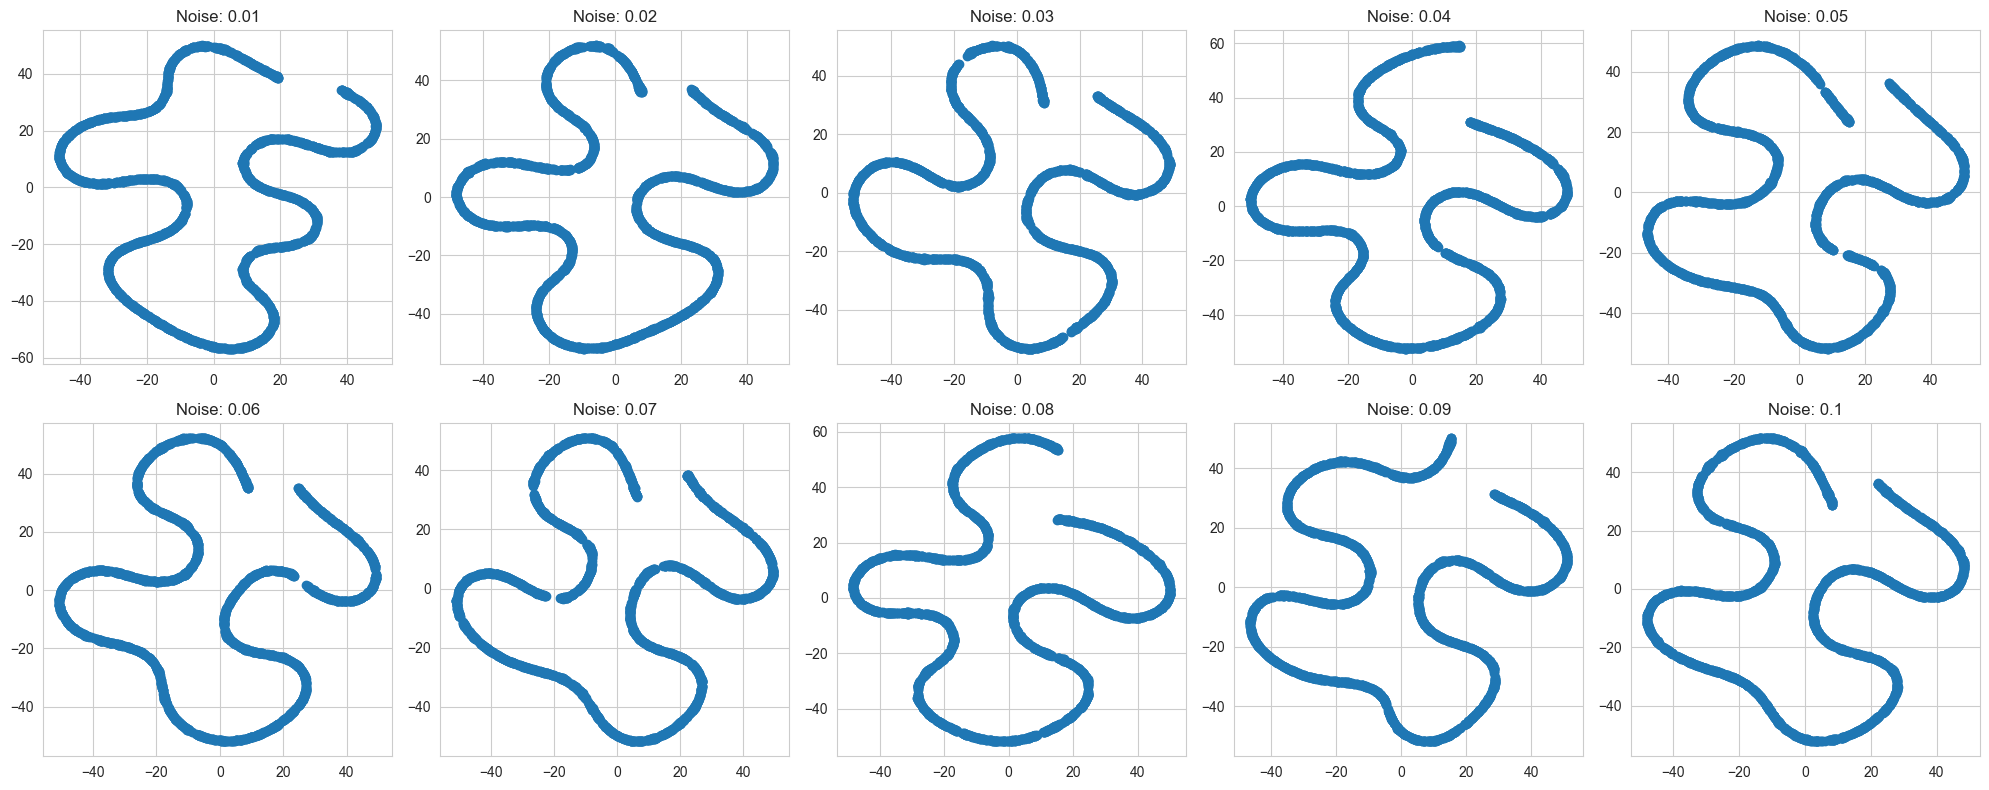

In [15]:
plot_embeddings_with_noise_variability()